
## 引入資料

In [ ]:
from sklearn import datasets # 引入sklearn裏頭的資料集

In [ ]:
data = datasets.load_boston() # 取得波士頓房價的數據

In [ ]:
import pandas as pd # 引入Pandas

df_data = pd.DataFrame(data.data, columns=data.feature_names) # 將數據以改成DataFrame的方式呈現

## 資料內容

In [ ]:
df_data #　查看資料

In [ ]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
data.target # 查看正確的房價

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## 檢查資料

### 缺失值檢查

In [ ]:
df_data.isnull().any() # 檢查是否有缺失值

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

### 不合理值的檢查

In [ ]:
flag = False
for i in df_data["LSTAT"]: # 檢查CRIM是否都為合理值
  if(i < 0 or i > 100):
    flag = True
    break
print(flag)

False


In [ ]:
df_data["CHAS"].unique()

array([0., 1.])

## 房價與每個特徵的關係

### 犯罪率

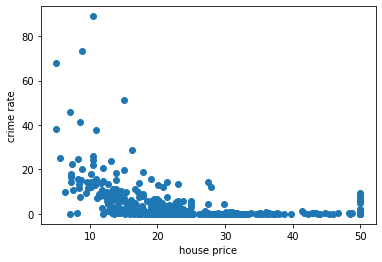

In [ ]:
import matplotlib.pyplot as plt

x = data.target # 房價數據
y = df_data["CRIM"] # 犯罪率數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("crime rate") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

### 房間數

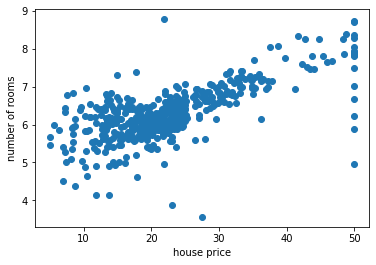

In [ ]:
x = data.target # 房價數據
y = df_data["RM"] # 房間數數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("number of rooms") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

### 黑人的比率

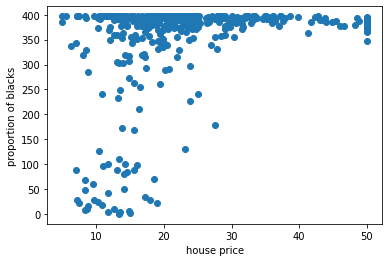

In [ ]:
x = data.target # 房價數據
y = df_data["B"] # 黑人比率數據

plt.xlabel("house price") # x軸的標題
plt.ylabel("proportion of blacks") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

## 各特徵間的相關性

In [ ]:
df_data.corr(method="pearson")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


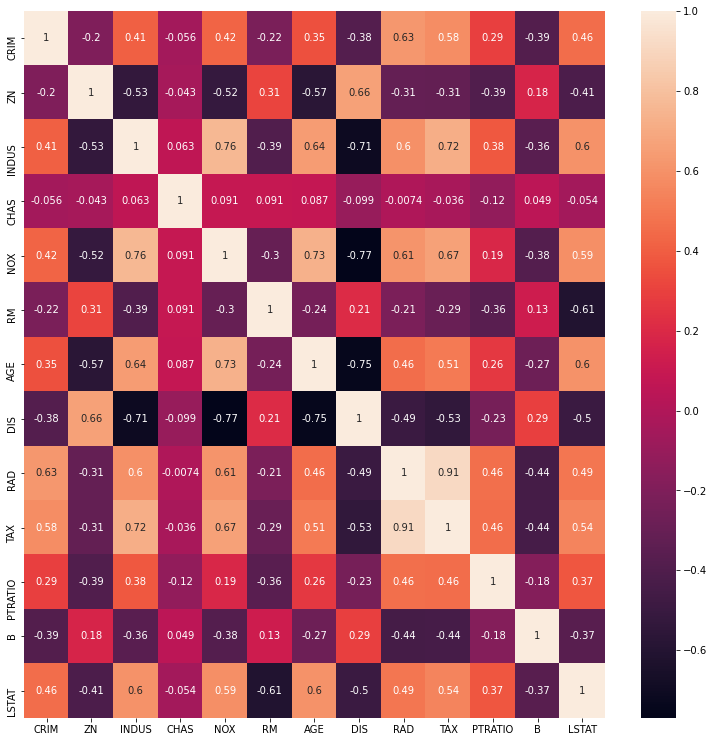

In [ ]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

plt.figure(figsize= (13, 13)) # 圖形大小
sns.heatmap(df_data.corr(),annot = True) # 塗顏色
plt.show() # 顯示圖形



## 線性迴歸

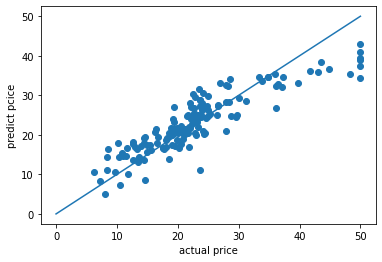

In [ ]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = data.data # 13個特徵的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

std_tool = StandardScaler()
x_train = std_tool.fit_transform(x_train) # 將資料標準化

lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

x_test = std_tool.transform(x_test)
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [ ]:
lnregr.score(x_train, y_train) # 訓練模型的正確率

0.7103879080674731

## 特徵重要性

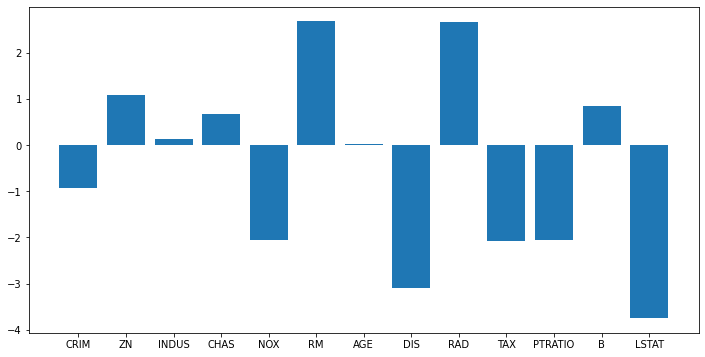

In [ ]:
import pandas as pd # 引入pandas
import numpy as np # 引入numpy
from sklearn.tree import DecisionTreeClassifier # 引入DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # 引入PCA
import matplotlib.pyplot as plt # 引入pyplot

x = data.data # 13個特徵的數據
y = data.target # 特徵名稱

std_tool = StandardScaler()
x = std_tool.fit_transform(x) # 將資料標準化

dt_model = LinearRegression()
dt_model.fit(x,y)
feature_importance = dt_model.coef_ # 重要性

plt.figure(figsize=(12, 6)) # 圖形大小
plt.bar(df_data.columns , feature_importance) # 繪製成直方圖
plt.show() # 顯示圖形

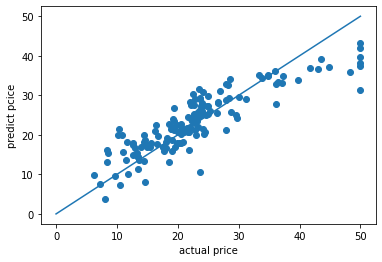

In [ ]:
df_data2 = df_data.drop(["CRIM", "INDUS", "CHAS", "AGE", "B"], axis = 1)

x = df_data2 # 重要特徵的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

std_tool = StandardScaler()
x_train = std_tool.fit_transform(x_train) # 將資料標準化

lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

x_test = std_tool.transform(x_test)
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [ ]:
lnregr.score(x_test, y_test) # 訓練模型的正確率

0.7609335561698132

## PCA降維


In [ ]:
from sklearn.model_selection import train_test_split # 引入train_test_split
from sklearn import decomposition # 引入decomposition
from sklearn.preprocessing import StandardScaler

x = data.data # pca降維後的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)
x_train = std_tool.transform(x_train)

# PC降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)

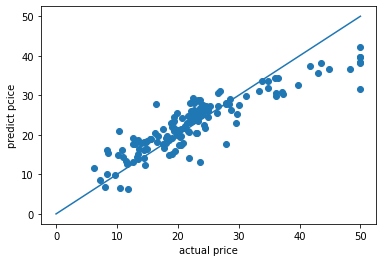

In [ ]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
import matplotlib.pyplot as plt # 引入pyplot


lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

# Standarize x_test
x_test = std_tool.transform(x_test)

# Dimension reduction usng PCA
x_test = pca.transform(x_test)
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [ ]:
lnregr.score(x_test, y_test) # 訓練模型的正確率

0.7723543146059919